In [2]:
import os
import pandas as pd

import copy, math
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('unsupervised_data.csv')


X_train = df.iloc[1:4000,1:-1].values

# K-Means clustering

def find_closest_centroids(X, centroids):

  # Set K
  K = centroids.shape[0]

  # You need to return the following variables correctly
  idx = np.zeros(X.shape[0], dtype=int)
  for i in range(X.shape[0]):
     #Array to hold distance between X[i] and each centroids[j]
     distance = []
     for j in range(centroids.shape[0]):
      norm_ij = np.linalg.norm(X[i] - centroids[j, :X.shape[1]])  # Your code to calculate the norm between (X[i] - centroids[j])
      distance.append(norm_ij)

     idx[i] = np.argmin(distance) # Your code here to calculate index of minimum value in distance

  return idx

def compute_centroids(X,idx,K):
  # Useful variables
  m, n = X.shape
  # You need to return the following variables correctly
  centroids = np.zeros((K, n))

    ### START CODE HERE ###
  for k in range(K):

    points = X[idx==k] # Your code here to get a list of all data points in X assigned to centroid k
    centroids[k] =  np.mean(points, axis = 0) # Your code here to compute the mean of the points assigne

  return centroids


def compute_cost_kmeans(X, idx, K, centroids):
  cost=0
  m = X.shape[0]
  for i in range(m):
    cost += np.linalg.norm(X[i] - centroids[idx[i]])
  cost = cost/m
  return cost


def kMeans_init_centroids(X, K):

  m, n = X.shape
  centroids = np.zeros((K, n))
  # Randomly reorder the indices of examples
  randidx = np.random.permutation(m)
  # Take the first K examples as centroids
  centroids = X[randidx[:K]]

  return centroids


def k_means(X, initial_centroids, max_iters):

  # Initialize values
  m, n = X.shape
  K = initial_centroids.shape[0]
  centroids = initial_centroids
  previous_centroids = centroids
  idx = np.zeros(m)

  #  Run K-Means
  for i in range(max_iters):

    # For each example in X, assign it to the closest centroid
    idx = find_closest_centroids(X, centroids)

    # Given the memberships, compute new centroids
    centroids = compute_centroids(X, idx, K)

  return centroids, idx


def run_kmeans(X,K, max_iters):

    for i in range(100):
        centroids_i = []
        J_history = []
        centroids_f = []
        centroids = kMeans_init_centroids(X, K)
        for j in range(max_iters):
           idx = find_closest_centroids(X, centroids)
           centroids = compute_centroids(X, idx, K)
           centroids_i.append(centroids)
           if j== max_iters - 1 :
             centroids_f.append(centroids_i[j])


        J_history.append(compute_cost_kmeans(X, idx, K, centroids_f[-1]))
    min_cost_index = np.argmin(J_history)

    return centroids_f

centroids_final = run_kmeans(X_train, 3, 10)

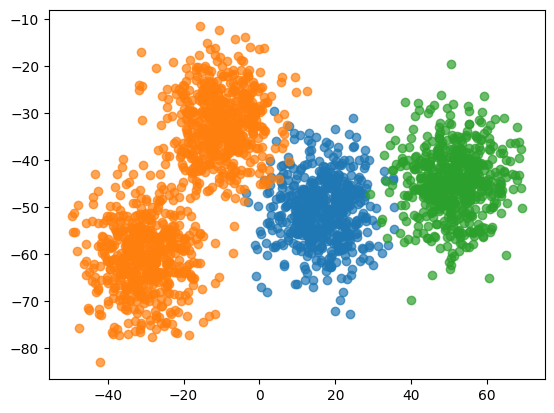

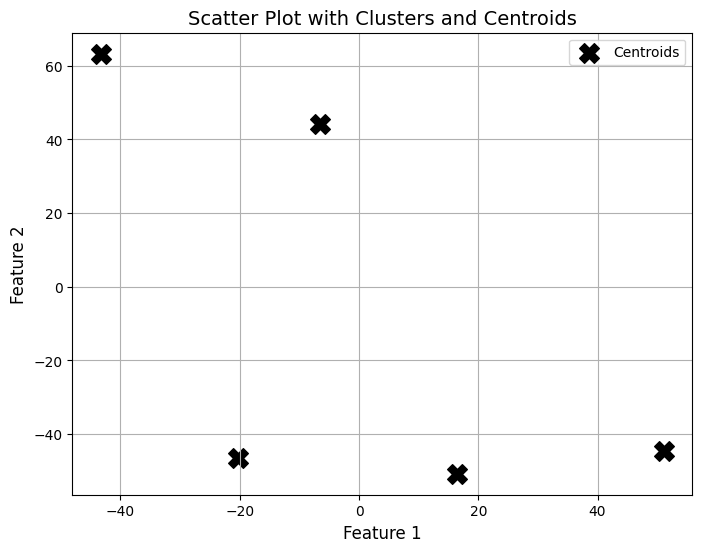

In [6]:
cluster_assignments = find_closest_centroids(X_train, centroids_final[0])

# Define clusters 1, 2, and 3
cluster_1_indices = np.where(cluster_assignments == 0)[0]  # Indices of data points in cluster 1
cluster_2_indices = np.where(cluster_assignments == 1)[0]  # Indices of data points in cluster 2
cluster_3_indices = np.where(cluster_assignments == 2)[0]  # Indices of data points in cluster 3

# Get the data points for each cluster
cluster_1_data = X_train[cluster_1_indices]
cluster_2_data = X_train[cluster_2_indices]
cluster_3_data = X_train[cluster_3_indices]

for cluster in range(3):  # Assuming 5 clusters
    plt.scatter(
        X_train[cluster_assignments == cluster, 0],
        X_train[cluster_assignments == cluster, 1],
        label=f'Cluster {cluster}',
        alpha=0.7
    )


plt.figure(figsize=(8,6))

# Plot centroids
plt.scatter(
    centroids_final[0][:, 0],
    centroids_final[0][:, 1],
    color='black',
    marker='X',
    s=200,
    label='Centroids'
)

# Add labels and title
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Scatter Plot with Clusters and Centroids', fontsize=14)

# Add legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()